In [6]:
using Pkg
Pkg.activate("/home/fedflorio/master_thesis")

  Activating project at `~/master_thesis`


In [7]:
using MatrixProductBP, MatrixProductBP.Models
using Graphs, IndexedGraphs, SparseArrays
using Random, Statistics
using Plots, LaTeXStrings
using ProgressMeter; ProgressMeter.ijulia_behavior(:clear)
using JLD2;

In [8]:
T = 20
N = 50
k = 4
seed = 0
rng = MersenneTwister(seed)
gg = random_regular_graph(N, k; seed)
# gg = prufer_decode(rand(rng, 1:N, N-2))
# gg = path_graph(N)
A = adjacency_matrix(gg)
rand!(rng, A.nzval, (-1,1))  # fill directed incidence matrix with rand(-1,1)
g = IndexedBiDiGraph(gg)
β = 1.0
J = 1.0
h = 0.5
w = [fill(PMJGlauberFactor([A[j,i] for j in inneighbors(g,i)], J, h, β), T+1) for i in vertices(g)]
# w = [fill(GenericGlauberFactor([A[j,i] for j in inneighbors(g,i)]*J, h, β), T+1) for i in vertices(g)]
m⁰ = -0.5
ϕᵢ = [ t == 0 ? [(1+m⁰)/2, (1-m⁰)/2] : ones(2) for t in 0:T]
bp = mpbp(g, w, fill(2,N), T; ϕ=fill(ϕᵢ,N));

Precompiling StructArraysGPUArraysCoreExt
  ✓ StructArrays → StructArraysGPUArraysCoreExt
  1 dependency successfully precompiled in 2 seconds. 20 already precompiled.


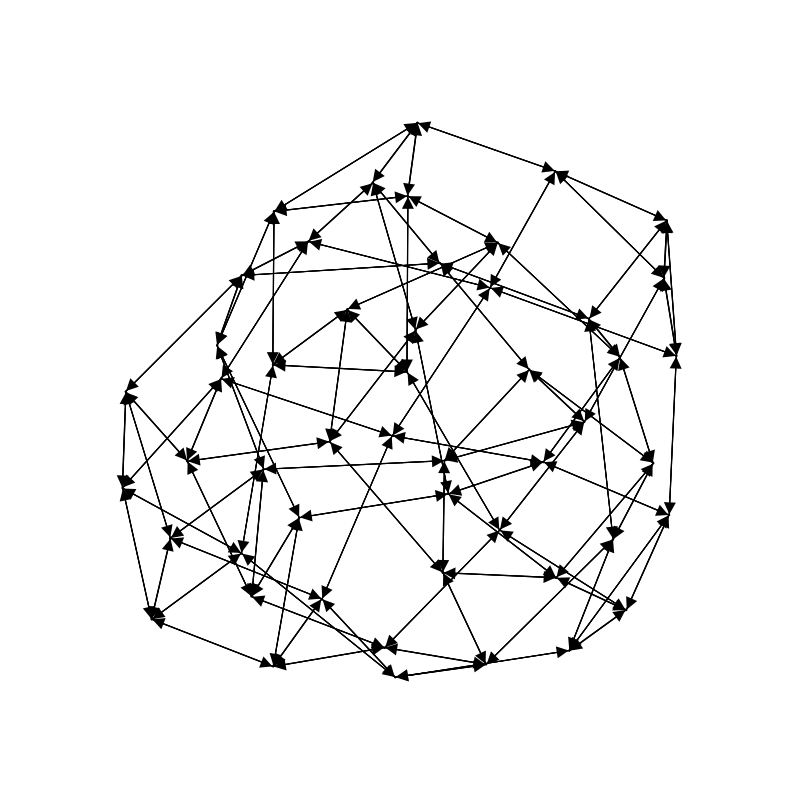

In [9]:
using GraphRecipes
graphplot(SimpleDiGraph(A), curves=false, size=(800,800), nodeshape=:circle,
    nodecolor=:black, nodesize=0.01, arrow=arrow(:closed, 0.1))

In [10]:
reset!(bp)
spin(x, i) = 3-2x
spin(x) = spin(x, 0)
cb = CB_BP(bp; f=spin);

In [11]:
svd_trunc = TruncBondThresh(12, 1e-6)
iters, cb = iterate!(bp, maxiter=50; svd_trunc, cb, tol=1e-3, damp=0.2);

Running MPBP: iter 6    Time: 2:03:44
  Δ:                  0.04079928333788885
